This notebook demonstrates how to use the Gemini API for detecting any objects.

#### Install Generative AI SDK

In [1]:
!pip install -q -U google-generativeai

#### Import libraries and dependencies

In [2]:
from google.colab import userdata
import google.generativeai as genai
import re
from PIL import Image
import cv2
import numpy as np

#### Configure Gemini API key

In [3]:
API_KEY = userdata.get('gemini')
genai.configure(api_key=API_KEY)

model = genai.GenerativeModel(model_name='gemini-1.5-pro')

#### Utility functions: Parse response and draw bounding boxes

In [90]:
def parse_bounding_box(response):
    bounding_boxes = re.findall(r'\[(\d+,\s*\d+,\s*\d+,\s*\d+,\s*[\w\s]+)\]', response)

    # Convert each group into a list of integers and labels.
    parsed_boxes = []
    for box in bounding_boxes:
        parts = box.split(',')
        numbers = list(map(int, parts[:-1]))
        label = parts[-1].strip()
        parsed_boxes.append((numbers, label))

    # Return the list of bounding boxes with their labels.
    return parsed_boxes

def draw_bounding_boxes(image, bounding_boxes_with_labels):
    label_colors = {}
    if image.mode != 'RGB':
        image = image.convert('RGB')

    image = np.array(image)

    for bounding_box, label in bounding_boxes_with_labels:

        # Normalize the bounding box coordinates
        width, height = image.shape[1], image.shape[0]
        ymin, xmin, ymax, xmax = bounding_box
        x1 = int(xmin / 1000 * width)
        y1 = int(ymin / 1000 * height)
        x2 = int(xmax / 1000 * width)
        y2 = int(ymax / 1000 * height)

        if label not in label_colors:
            color = np.random.randint(0, 256, (3,)).tolist()
            label_colors[label] = color
        else:
            color = label_colors[label]

        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        font_thickness = 2
        box_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]

        text_bg_x1 = x1
        text_bg_y1 = y1 - text_size[1] - 5
        text_bg_x2 = x1 + text_size[0] + 8
        text_bg_y2 = y1


        cv2.rectangle(image, (text_bg_x1, text_bg_y1), (text_bg_x2, text_bg_y2), color, -1)
        cv2.putText(image, label, (x1 + 2, y1 - 5), font, font_scale, (255, 255, 255), font_thickness)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, box_thickness)

    image = Image.fromarray(image)
    return image

#### Example 1

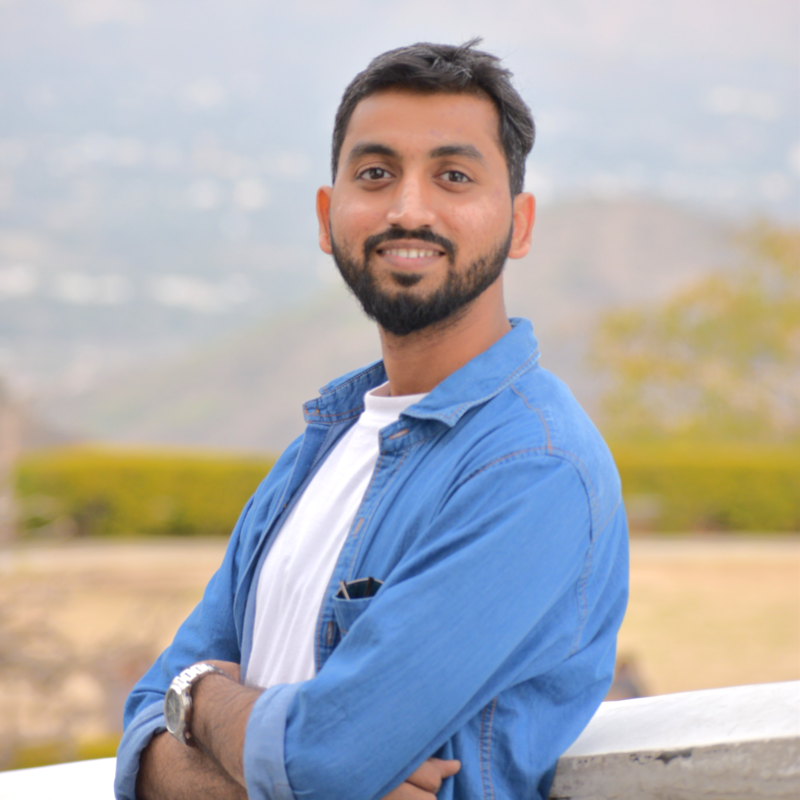

- [47, 133, 1000, 796, man]



In [74]:
input_image = "image1.png" # @param {type : 'string'}
img = Image.open(input_image)

response = model.generate_content([
    img,
    (
        "Return bounding boxes for person in the image in the following format as"
        " a list. \n [ymin, xmin, ymax, xmax, object_name]. If there are more than one person, return separate lists for each person"
    ),
])

result = response.text
display(img)
print(result)

In [75]:
bounding_box = parse_bounding_box(result)
print(bounding_box)

output = draw_bounding_boxes(img, bounding_box)
output_image = "output_" + input_image
output.save(output_image)

[([47, 133, 1000, 796], 'man')]


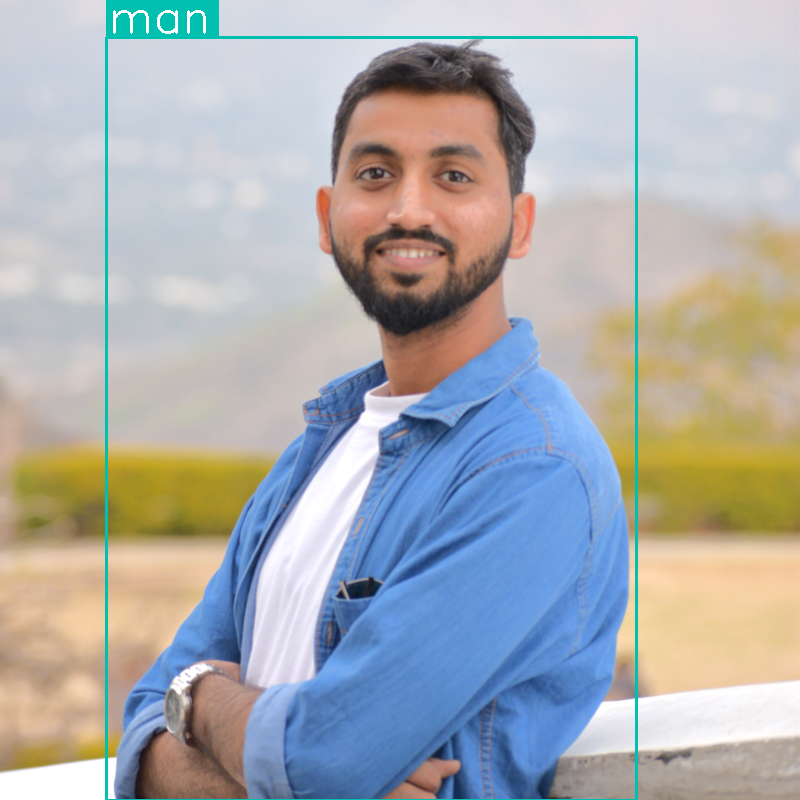

In [76]:
display(output)

#### Example 2:

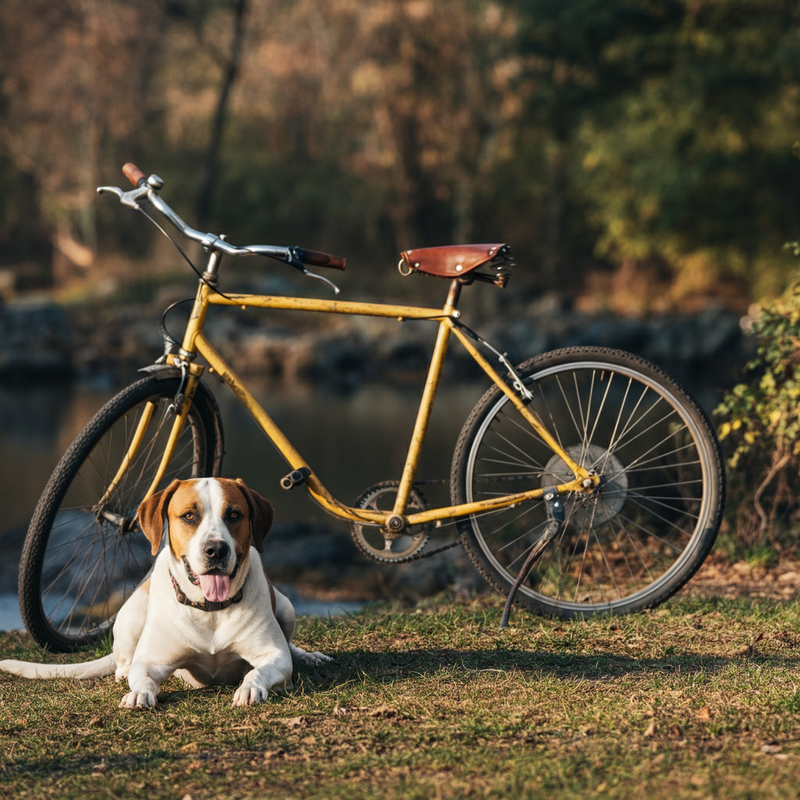

- [200, 36, 791, 917, bike]
- [593, 6, 887, 402, dog]



In [77]:
input_image = "image2.png" # @param {type : 'string'}
img = Image.open(input_image)

response = model.generate_content([
    img,
    (
        "Return bounding boxes for all objects in the image in the following format as"
        " a list. \n [ymin, xmin, ymax, xmax, object_name]. If there are more than one object, return separate lists for each object"
    ),
])

result = response.text
display(img)
print(result)

In [78]:
bounding_box = parse_bounding_box(result)
print(bounding_box)

output = draw_bounding_boxes(img, bounding_box)
output_image = "output_" + input_image
output.save(output_image)

[([200, 36, 791, 917], 'bike'), ([593, 6, 887, 402], 'dog')]


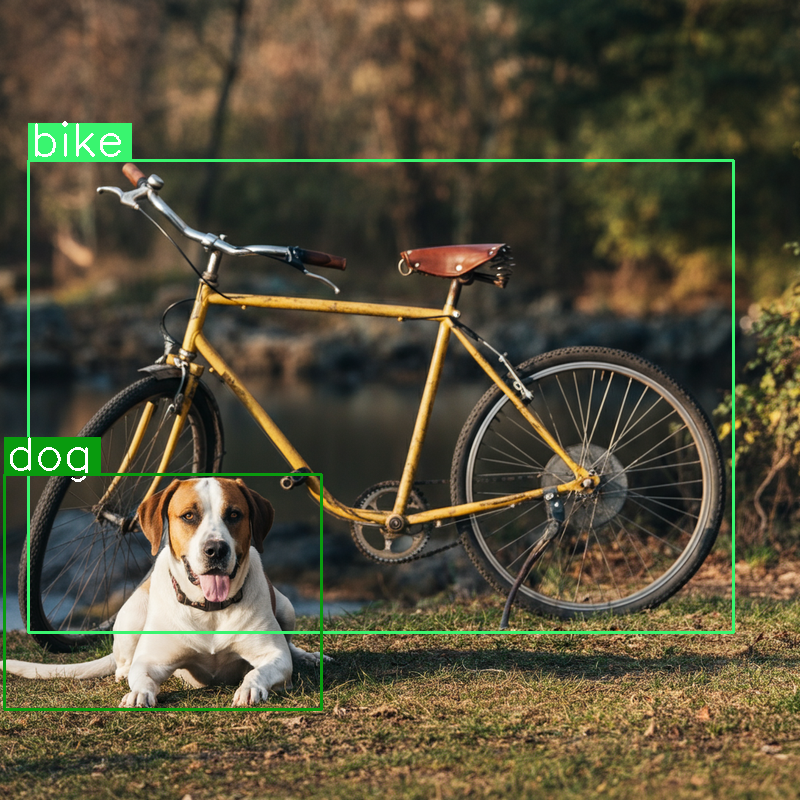

In [79]:
display(output)

#### Example 3:

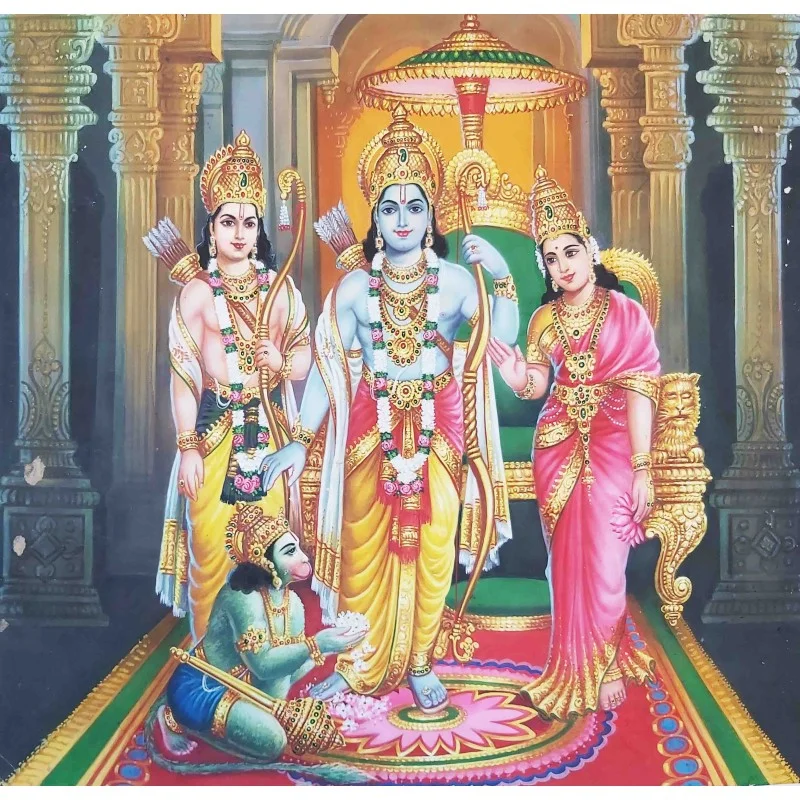

Here are the bounding boxes of the objects in the Ramayana painting.
- [616, 196, 980, 454, 'Lord Hanuman']
- [219, 616, 899, 828, 'Devi Sita']
- [160, 193, 813, 395, 'Lakshman']
- [140, 329, 908, 629, 'Lord Ram']



In [84]:
input_image = "image3.png" # @param {type : 'string'}
img = Image.open(input_image)

response = model.generate_content([
    img,
    (
        "This is a famous painting of Ram Darbar from Ramayan. Return name and bounding boxes for all the characters in the image in the following format as"
        " a list. \n [ymin, xmin, ymax, xmax, object_name]. "
    ),
])

result = response.text
display(img)
print(result)

In [93]:
result = response.text
result = result.replace("'", '')
bounding_box = parse_bounding_box(result)
print(bounding_box)

output = draw_bounding_boxes(img, bounding_box)
output_image = "output_" + input_image
output.save(output_image)

[([616, 196, 980, 454], 'Lord Hanuman'), ([219, 616, 899, 828], 'Devi Sita'), ([160, 193, 813, 395], 'Lakshman'), ([140, 329, 908, 629], 'Lord Ram')]


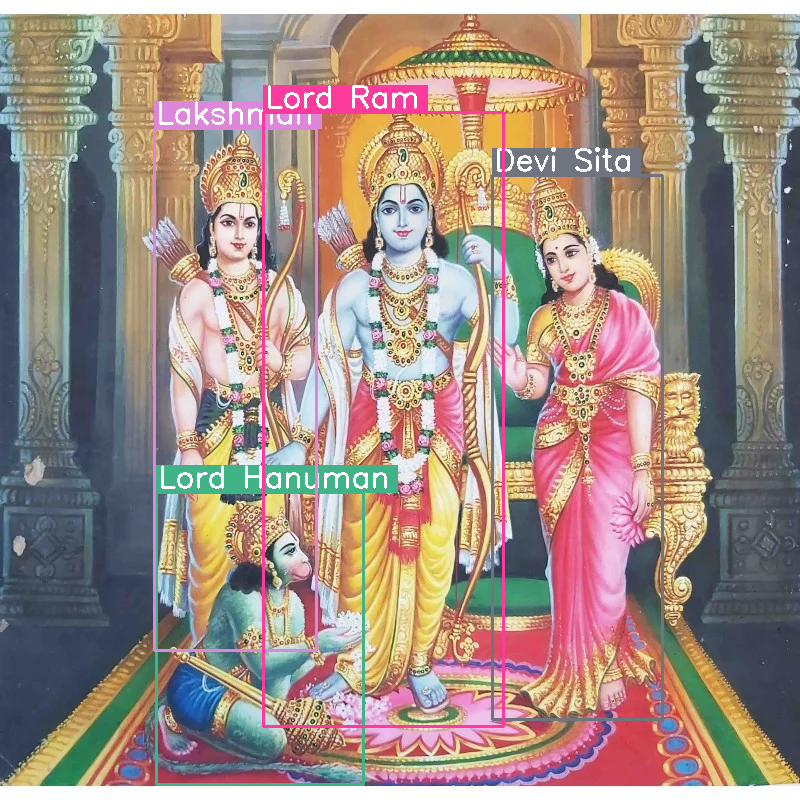

In [94]:
display(output)

#### Example 4:

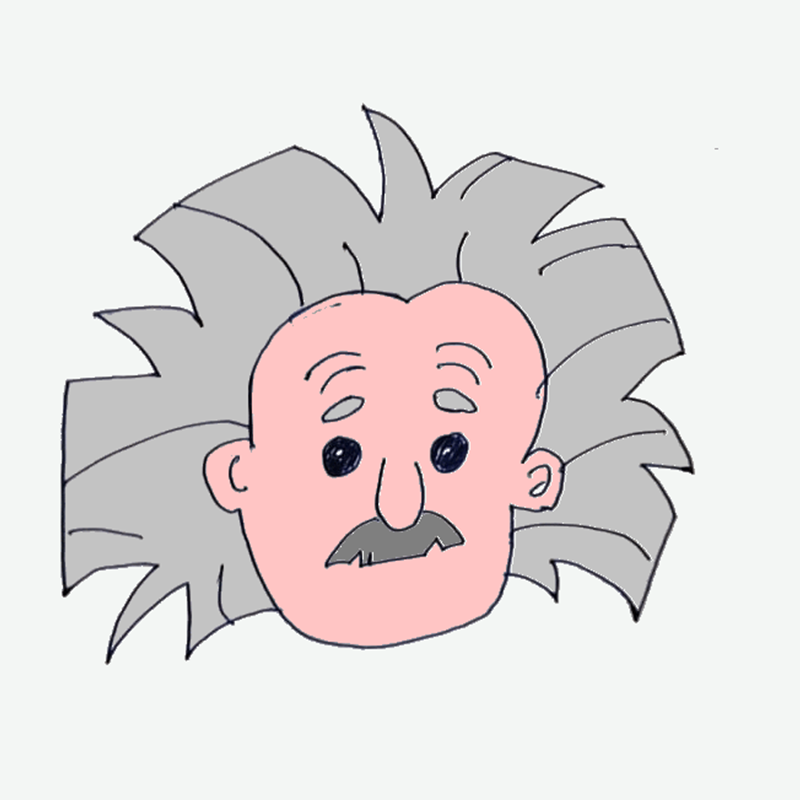

Please find the answer in the requested format below:
- [140, 62, 834, 872, Albert Einstein]



In [80]:
input_image = "image4.png" # @param {type : 'string'}
img = Image.open(input_image)

response = model.generate_content([
    img,
    (
        "Return bounding boxes for a famous personality in the image in the following format as"
        " a list. \n [ymin, xmin, ymax, xmax, object_name]. "
    ),
])

result = response.text
display(img)
print(result)

In [81]:
bounding_box = parse_bounding_box(result)
print(bounding_box)

output = draw_bounding_boxes(img, bounding_box)
output_image = "output_" + input_image
output.save(output_image)

[([140, 62, 834, 872], 'Albert Einstein')]


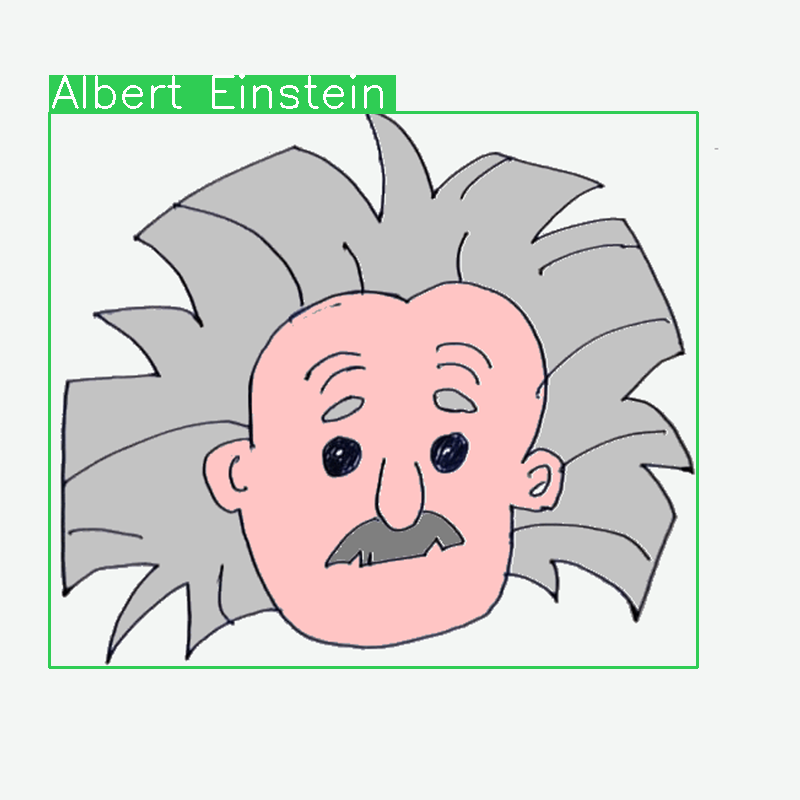

In [82]:
display(output)